## **Análise de Sentimentos usando Machine Learning**

* Criando modelos para análise de sentimentos de tweets

In [1]:
from nltk import word_tokenize
import nltk
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

## Importando arquivo CSV


**Ler arquivo de dados e conta a quantidade de linhas**

In [2]:
df = pd.read_csv('data/tweets_Mg.csv', encoding='utf-8')

In [3]:
df.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8199 entries, 0 to 8198
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8199 non-null   int64  
 1   Created At                 8199 non-null   object 
 2   Text                       8199 non-null   object 
 3   Geo Coordinates.latitude   104 non-null    float64
 4   Geo Coordinates.longitude  104 non-null    float64
 5   User Location              5489 non-null   object 
 6   Username                   8199 non-null   object 
 7   User Screen Name           8199 non-null   object 
 8   Retweet Count              8199 non-null   int64  
 9   Classificacao              8199 non-null   object 
 10  Observação                 1 non-null      object 
 11  Unnamed: 10                0 non-null      float64
 12  Unnamed: 11                0 non-null      float64
 13  Unnamed: 12                0 non-null      float

In [5]:
df.shape

(8199, 26)

## Tratamento a primeiras análises

**Selecionando features principais**

In [6]:
df.columns

Index(['Unnamed: 0', 'Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [7]:
#SELECIONANDO COLUNAS MAIS RELEVANTES
df= df[['Created At', 'Text','User Screen Name', 'Retweet Count', 'Classificacao']]

In [8]:
df.head()

,Created At,Text,User Screen Name,Retweet Count,Classificacao
0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,LeoCSchneider,0,Neutro
1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",klefnews,0,Neutro
2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",klefnews,0,Neutro
3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,estudandoconcur,0,Neutro
4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,Milly777,0,Negativo


temos aproximadamente 8200 tweets pra treinar o nosso modelo

Tranformando "Created At" em data e criando novas features

In [9]:
df['Created At'] = pd.to_datetime(df['Created At'])
df['Year'] = df['Created At'].dt.year
df['Month'] = df['Created At'].dt.month
df['Day'] = df['Created At'].dt.day
df["Weekday"] = df['Created At'].dt.weekday
df["Dayname"] = df['Created At'].dt.day_name()

In [10]:
#EXCLUINDO LINKS NA FEATURE Text
for idx, Texto in enumerate(df["Text"]):
    df["Text"][idx] = Texto.replace("\n", "")
    df["Text"][idx] = Texto.replace("�", "")
    padrao = re.compile('https:.+')
    if padrao.findall(Texto):
        https = padrao.findall(Texto)
        df["Text"][idx] = df["Text"][idx].replace(https[0], "")




C:\Users\Usuário\AppData\Local\Temp\ipykernel_7336\3454870162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Text"][idx] = Texto.replace("\n", "")
C:\Users\Usuário\AppData\Local\Temp\ipykernel_7336\3454870162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Text"][idx] = Texto.replace("�", "")
C:\Users\Usuário\AppData\Local\Temp\ipykernel_7336\3454870162.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Text"][idx

In [11]:
pd.options.display.max_colwidth = 130
df["Text"]

0                                                               ⛪ @ Catedral de Santo Antônio - Governador Valadares/MG 
1                                                                                  @ Governador Valadares, Minas Gerais 
2                                                                                  @ Governador Valadares, Minas Gerais 
3                                                                                                                       
4                    PSOL vai questionar aumento de vereadores e prefeito de BH na Justiça - Politica - Estado de Minas 
                                                              ...                                                       
8194                                               Trio é preso suspeito de roubo, tráfico e abuso sexual em Uberlândia 
8195                                               Trio é preso suspeito de roubo, tráfico e abuso sexual em Uberlândia 
8196                            

excluindo textos duplicados

In [12]:
df.drop_duplicates(['Text'], inplace=True)

In [13]:
df.reset_index(drop = ["index"], inplace = True)

**Conta a quantidade de linhas de tweets neutros, positivos e negativos**

In [14]:
df.Classificacao.value_counts()

Neutro      1579
Positivo    1393
Negativo     575
Name: Classificacao, dtype: int64

<AxesSubplot:>

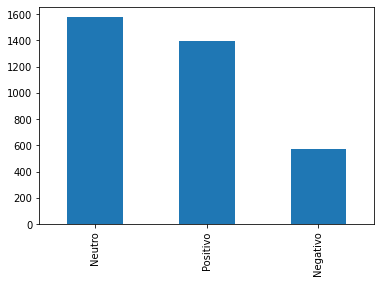

In [15]:
%matplotlib inline
df.Classificacao.value_counts().plot(kind='bar')

In [16]:
df.count()

Created At          3547
Text                3547
User Screen Name    3547
Retweet Count       3547
Classificacao       3547
Year                3547
Month               3547
Day                 3547
Weekday             3547
Dayname             3547
dtype: int64

## Pre-Processamento dos Dados

* Remove Stopwords
* Stemming ou Lemmatization
* Remove caracteres indesejados como links etc.

**Separando tweets e suas Classes**

In [17]:
tweets = df['Text']
classes = df['Classificacao']

In [18]:
tweets.head(20)

0                                                                              ⛪ @ Catedral de Santo Antônio - Governador Valadares/MG 
1                                                                                                 @ Governador Valadares, Minas Gerais 
2                                                                                                                                      
3                                   PSOL vai questionar aumento de vereadores e prefeito de BH na Justiça - Politica - Estado de Minas 
4                   " bom é bandido morto"\nDeputado Cabo Júlio é condenado e fica inelegível por 10 anos - Politica - Estado de Minas 
5                 "..E 25% dos mineiros dizem não torcer para time nenhum,mesmo dentro de um estado com Atlético-MG e Cruzeiro. Pq?.." 
6                                                       "A gigantesca barba do mal" em destaque no caderno Cultura do Estado de Minas. 
7                                               

In [19]:
classes

0         Neutro
1         Neutro
2         Neutro
3       Negativo
4         Neutro
          ...   
3542    Positivo
3543    Positivo
3544    Positivo
3545    Positivo
3546    Positivo
Name: Classificacao, Length: 3547, dtype: object

**Instala bibliotecas e baixa a base de dados**

In [35]:
import nltk
# nltk.download('stopwords')
# nltk.download('rslp')
# nltk.download('punkt')
# nltk.download('wordnet')
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Usuário\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Usuário\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Usuário\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Usuário\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Usuário\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping grammars\basque_grammars.zip.
[nlt

True

In [21]:
stopwords = set(nltk.corpus.stopwords.words('portuguese'))
stopwords.update(["nem", "dia", "sua", "está", "por","de",'dar','pois','em','um','da','ser','aqui','vou','dos','ter','não','ao','sou','seu','à','n','se','esse','uma','mais','ele','fazendo','você','pode','essa','é','mas','segue','pra','isso','vez','para','muito','pelo','pela','são', 'na','vamos','https','t','co','c','New','eu','seis','retweets','ano','pessoa','likes', "nos", "já", "há", "até", "foi", "como", "quem", "cada","lá", "sem", 'vai','que','ou', "muita", "das", "bem", 'anos','7dias','tirou','tem','q','0','O','e','os','assim','só','mesmo','tá','pro','votar','pessoas','vc'])

In [22]:
len(stopwords)

247

**Funções de Pre-processamento de dados**

Função para remover dos textos as palavras stopwords, palavras que não são relevantes para a nossa análise de sentimento.

In [23]:
def RemoveStopWords(instancia):
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

A função stem.RSLPStemmer() reduz a palavra ao seu radical

In [24]:
def Stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

In [25]:
# remove links, pontos, virgulas,ponto e virgulas dos tweets
def Limpeza_dados(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instancia)

lematização das palavras

In [36]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()
def Lemmatization(instancia):
  palavras = []
  for w in instancia.split():
    palavras.append(wordnet_lemmatizer.lemmatize(w))
  return (" ".join(palavras))

**Entenda como funciona cada função**

In [27]:
RemoveStopWords('Eu não gosto do partido, e também não votaria novamente nesse governante!')

'Eu gosto partido, votaria novamente nesse governante!'

In [28]:
Stemming('Eu não gosto do partido, e também não votaria novamente nesse governante!')

'eu não gost do partido, e também não vot nov ness governante!'

In [29]:
Limpeza_dados('Assita aqui o video do Governador falando sobre a CEMIG https://www.uol.com.br :) ;)')

'assita aqui o video do governador falando sobre a cemig   '

In [37]:
Lemmatization('Os carros são bonitos')

'Os carros são bonito'

**Aplica as 3 funções de Pre-processamento nos dados**

In [38]:
def Preprocessing(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [stemmer.stem(i) for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

# Aplica a função em todos os dados:
tweets = [Preprocessing(i) for i in tweets]

In [39]:
Preprocessing('Eu não gosto do partido, e também não votaria novamente nesse governante. Assita o video aqui https:// :)')

'gost partido, vot nov ness govern assit vide aqu'

**Visualize os dados e veja como ficou após o pré-processamento**

In [40]:
#dados tratados
tweets[:50]

['⛪ @ catedr sant antôni govern valadares/mg',
 '@ govern valadares, min geral',
 '',
 'psol vai quest aument vere prefeit bh justiç poli est min',
 '" bom band morto" deput cab júli conden fic ineleg 10 ano poli est min',
 '"e 25% min diz torc tim nenhum,mesm dentr est atléticomg cruz pq?"',
 '"a gigantesc barb mal" destaqu cadern cult est min',
 '"bb govern min tr disput sobr depósit judiciais"',
 '"com vc bh fic pequena!" bel horizont (pron [bɛloɾiˈzõntʃi][10] capit est mg, áre aproximad 331 km²',
 '"daí gent visit govern valadares" "qu lug eh mãe?" "mg, gent um parent la" man ond q parent',
 '"é bonit bonita" #latergr #ibiturun #hom @ govern valadares, min geral',
 '"err desconhecido" mato! aliás, secret estad fazend tá assim mg precis dinh não, governador?',
 '"la la land cant estações" arras glob our est min',
 '"lo abusos, aun en el est má sólido, son min sord tard tempr estallan" joseph sanialdubay',
 '"mesm dinh caix govern min geral compr 2 (doil helicópteros" doi helicópter 

## **Tokenização e criação de modelos**
- Atente para o tipo de dados que você está trabalhando.

In [41]:
from nltk.tokenize import word_tokenize


In [42]:
frase = 'A live do @blogminerando é show! :) :-) ;) =D'

In [43]:
word_tokenize(frase)

['A',
 'live',
 'do',
 '@',
 'blogminerando',
 'é',
 'show',
 '!',
 ':',
 ')',
 ':',
 '-',
 ')',
 ';',
 ')',
 '=D']

In [44]:
from nltk.tokenize import TweetTokenizer

In [45]:
#Sem repetir token
tweet_tokenizer = TweetTokenizer()

In [46]:
tweet_tokenizer.tokenize(frase)

['A',
 'live',
 'do',
 '@blogminerando',
 'é',
 'show',
 '!',
 ':)',
 ':-)',
 ';)',
 '=D']

## Criando o modelo

**Instancia o objeto que faz a vetorização dos dados de texto**

In [47]:
vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)
# vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize, max_features=1000)   <-- bases muito grandes

**Aplica o vetorizador nos dados de texto**

In [48]:
freq_tweets = vectorizer.fit_transform(tweets)
type(freq_tweets)

scipy.sparse._csr.csr_matrix

**Formato (Linhas, Colunas) da matriz**

In [49]:
freq_tweets.shape

(3547, 5968)

**Treino do modelo de Machine Learning**

Classificador Naive Bayes para modelos multinomiais.

O classificador multinomial Naive Bayes é adequado para classificação com características discretas (por exemplo, contagem de palavras para classificação de texto). A distribuição multinomial normalmente requer contagens de características inteiras. No entanto, na prática, contagens fracionárias como tf-idf também podem funcionar.

In [50]:
modelo = MultinomialNB()
modelo.fit(freq_tweets, classes)

MultinomialNB()

**Matriz**

In [51]:
freq_tweets.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

**Testando o modelo com algumas instâncias simples**

In [52]:
# defina instâncias de teste dentro de uma lista
testes = ['Esse governo está no início, vamos ver o que vai dar',
          'Estou muito feliz com o governo de Minas esse ano',
          'O estado de Minas Gerais decretou calamidade financeira!!!',
          'A segurança desse país está deixando a desejar',
          'O governador de Minas é mais uma vez do PT']

**Aplica a função de Pré-processamento nos dados**

In [53]:
testes = [Preprocessing(i) for i in testes]

In [54]:
# Transforma os dados de teste em vetores de palavras.
freq_testes = vectorizer.transform(testes)

In [55]:
# Fazendo a classificação com o modelo treinado.
for t, c in zip (testes, modelo.predict(freq_testes)):
    print (t +", "+ c)

govern início, vam ver vai dar, Neutro
feliz govern min ano, Neutro
est min geral decret calam financeira!!!, Negativo
seguranç dess país deix desej, Neutro
govern min vez pt, Negativo


In [56]:
# Probabilidades de cada classe
print (modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.15, 0.85, 0.  ],
       [0.04, 0.92, 0.04],
       [1.  , 0.  , 0.  ],
       [0.04, 0.92, 0.03],
       [0.59, 0.4 , 0.01]])

## **Tags de Negações**

* Acrescenta uma tag _NEG encontrada após um 'não'.
* Objetivo é dar mais peso para o modelo identificar uma inversão de sentimento da frase.
* Exemplos: 
    - Eu gosto de cachorros, positivo.
    - Eu **não** gosto de cachorros, negativo.

In [57]:
def marque_negacao(texto):
    negacoes = ['não','not']
    negacao_detectada = False
    resultado = []
    palavras = texto.split()
    for p in palavras:
        p = p.lower()
        if negacao_detectada == True:
            p = p + '_NEG'
        if p in negacoes:
            negacao_detectada = True
        resultado.append(p)
    return (" ".join(resultado))

**Exemplos de utilização da tag de negações**

In [58]:
marque_negacao('Eu gosto do partido, votaria novamente nesse governante!')

'eu gosto do partido, votaria novamente nesse governante!'

In [59]:
marque_negacao('Eu Não gosto do partido e também não votaria novamente nesse governante!')

'eu não gosto_NEG do_NEG partido_NEG e_NEG também_NEG não_NEG votaria_NEG novamente_NEG nesse_NEG governante!_NEG'

## **Criando modelos com Pipelines**

* Pipelines são interessantes para reduzir código e automatizar fluxos

In [61]:
from sklearn.pipeline import Pipeline

Modelo com MultinomialNB

In [62]:
pipeline_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', MultinomialNB())
  ])

* Pipeline que atribui tag de negacoes nas palavras

In [63]:
pipeline_negacoes = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', MultinomialNB())
])

In [64]:
pipeline_simples.fit(tweets, classes)

Pipeline(steps=[('counts', CountVectorizer()), ('classifier', MultinomialNB())])

In [65]:
pipeline_simples.steps

[('counts', CountVectorizer()), ('classifier', MultinomialNB())]

* Gera o modelo de negações

In [66]:
pipeline_negacoes.fit(tweets, classes)

Pipeline(steps=[('counts',
                 CountVectorizer(tokenizer=<function <lambda> at 0x00000239BC943010>)),
                ('classifier', MultinomialNB())])

* Etapas do pipeline

In [67]:
pipeline_negacoes.steps

[('counts',
  CountVectorizer(tokenizer=<function <lambda> at 0x00000239BC943010>)),
 ('classifier', MultinomialNB())]

Modelo com SVM

In [68]:
pipeline_svm_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', svm.SVC(kernel='linear'))
])

In [70]:
pipeline_svm_simples.fit(tweets, classes)

Pipeline(steps=[('counts', CountVectorizer()),
                ('classifier', SVC(kernel='linear'))])

In [71]:
pipeline_svm_simples.steps

[('counts', CountVectorizer()), ('classifier', SVC(kernel='linear'))]

In [69]:
pipeline_svm_negacoes = Pipeline([
  ('counts', CountVectorizer(tokenizer=lambda text: marque_negacao(text))),
  ('classifier', svm.SVC(kernel='linear'))
])

## Validando os Modelos com Validação Cruzada

* Fazendo o cross validation do modelo

In [72]:
resultados = cross_val_predict(pipeline_simples, tweets, classes, cv=10)

* Medindo a acurácia média do modelo

In [73]:
metrics.accuracy_score(classes, resultados)

0.8500140964195094

* Medidas de validação do modelo

In [77]:
print (metrics.classification_report(classes, resultados))

              precision    recall  f1-score   support

    Negativo       0.72      0.85      0.78       575
      Neutro       0.85      0.84      0.84      1579
    Positivo       0.92      0.87      0.89      1393

    accuracy                           0.85      3547
   macro avg       0.83      0.85      0.84      3547
weighted avg       0.86      0.85      0.85      3547



* Matriz de confusão

In [78]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       486      77        12   575
Neutro         158    1324        97  1579
Positivo        34     154      1205  1393
All            678    1555      1314  3547


## **Acuracia dos modelos**

In [79]:
def Metricas(modelo, tweets, classes):
  resultados = cross_val_predict(modelo, tweets, classes, cv=10)
  return 'Acurácia do modelo: {}'.format(metrics.accuracy_score(classes,resultados))

### **Modelo simples**

In [80]:
# naive bayes simples
Metricas(pipeline_simples, tweets, classes)

'Acurácia do modelo: 0.8500140964195094'

In [81]:
# svm linear simples
Metricas(pipeline_svm_simples,tweets,classes)

'Acurácia do modelo: 0.8660840146602763'

### **Modelo com a Tag de Negações**

* Medindo a acurácia média do modelo

In [82]:
# naive bayes com tag de negacoes
Metricas(pipeline_negacoes,tweets,classes)

'Acurácia do modelo: 0.6740907809416409'

In [83]:
# svm linear com tag de negacoes
Metricas(pipeline_svm_negacoes,tweets,classes)

'Acurácia do modelo: 0.7059486890329856'

* Validacao cruzada 

In [84]:
resultados = cross_val_predict(pipeline_negacoes, tweets, classes, cv=10)

In [86]:
print (metrics.classification_report(classes,resultados))

              precision    recall  f1-score   support

    Negativo       0.58      0.54      0.56       575
      Neutro       0.70      0.70      0.70      1579
    Positivo       0.68      0.71      0.69      1393

    accuracy                           0.67      3547
   macro avg       0.65      0.65      0.65      3547
weighted avg       0.67      0.67      0.67      3547



* Matriz de confusão

In [87]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       309     158       108   575
Neutro         125    1099       355  1579
Positivo       103     307       983  1393
All            537    1564      1446  3547


## **Avaliando modelo com Bigrams**

Eu gosto do Brasil -------------> **'eu gosto', 'gosto do' , 'do brasil'**

In [88]:
# Bigrams
vectorizer = CountVectorizer(ngram_range=(2,2))
freq_tweets = vectorizer.fit_transform(tweets)
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB()

In [89]:
resultados = cross_val_predict(modelo, freq_tweets, classes, cv=10)

In [90]:
metrics.accuracy_score(classes,resultados)

0.7815054976036087

In [91]:
print (metrics.classification_report(classes,resultados))

              precision    recall  f1-score   support

    Negativo       0.47      0.92      0.62       575
      Neutro       0.92      0.70      0.80      1579
    Positivo       0.93      0.81      0.87      1393

    accuracy                           0.78      3547
   macro avg       0.77      0.81      0.76      3547
weighted avg       0.85      0.78      0.80      3547



In [92]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       527      40         8   575
Neutro         395    1113        71  1579
Positivo       200      61      1132  1393
All           1122    1214      1211  3547


não houve melhora do modelo usando o 

## Utilização de modelo com a melhor acuracia - SVM_linear

In [93]:
pipeline_svm_simples = Pipeline([
  ('counts', CountVectorizer()),
  ('classifier', svm.SVC(kernel='linear'))])

In [94]:
pipeline_svm_simples.fit(tweets, classes)

Pipeline(steps=[('counts', CountVectorizer()),
                ('classifier', SVC(kernel='linear'))])

In [95]:
resultados = cross_val_predict(pipeline_svm_simples, tweets, classes, cv=10)

In [96]:
print('Acurácia do modelo: {}'.format(metrics.accuracy_score(classes,resultados)))

Acurácia do modelo: 0.8660840146602763


In [97]:
print (pd.crosstab(classes, resultados, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   Negativo  Neutro  Positivo   All
Real                                      
Negativo       463     105         7   575
Neutro          91    1427        61  1579
Positivo        29     182      1182  1393
All            583    1714      1250  3547


**Testando nosso modelo** - Parte 1

In [118]:
# defina instâncias de teste dentro de uma lista
testes = ['Esse governo está no início, vamos ver o que vai dar',
          'Estou muito feliz com o governo de Minas esse ano',
          'O estado de Minas Gerais decretou calamidade financeira!!!',
          'A segurança desse país está deixando a desejar',
          'O governador de Minas é mais uma vez do PT']

In [119]:
palavras = [Preprocessing(i) for i in testes]

In [100]:
palavras

['govern início, vam ver vai dar',
 'feliz govern min ano',
 'est min geral decret calam financeira!!!',
 'seguranç dess país deix desej',
 'govern min vez pt']

In [ ]:
pipeline_svm_simples.predict(texto)

In [102]:
for i, t in zip(testes, pipeline_svm_simples.predict(palavras)):
    print (i, ", ", t)

Esse governo está no início, vamos ver o que vai dar ,  Neutro
Estou muito feliz com o governo de Minas esse ano ,  Neutro
O estado de Minas Gerais decretou calamidade financeira!!! ,  Negativo
A segurança desse país está deixando a desejar ,  Positivo
O governador de Minas é mais uma vez do PT ,  Negativo


Criando arquivo pkl com o pipeline_svm_simples

In [113]:
import joblib

In [114]:
joblib.dump(pipeline_svm_simples, "model.pkl")

['model.pkl']

In [115]:
model = joblib.load('model.pkl')